# PRACTICA GUIADA: Regresión logística 


## 1. Introducción

En este caso, estamos interesados en entender cómo variables como los resultados en los tests GRE(Graduate Record Exam), el GPA (Grade Point Average - promedio en el grado) y el prestigio de la institución de proveniencia afectan las probabilidades de ingreso o admisión de cada candidato. Para ello se construye una muestra de 400 pedidos de ingreso a universidades 10 universidades y se registra la información correspondiente. 
La variable dependiente es el resultado final de la admisión: si el estudiante fue admitido ($admin=1$) o no ($admin=0$).

## 2. Creación del dataset y análisis exploratorio

Importamos los paquetes a utilizar el dataset y realizamos un primer análisis descriptivo del mismo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [3]:
df = pd.read_csv('../Data/binary.csv')
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
# Prestige = 1 es el valor superior
df.prestige.unique()

array([3, 1, 4, 2], dtype=int64)

Realicemos, ahora, un análisis gráfico exploratorio de los datos:

In [5]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [6]:
df['admit'].value_counts(normalize=True)

0    0.6825
1    0.3175
Name: admit, dtype: float64

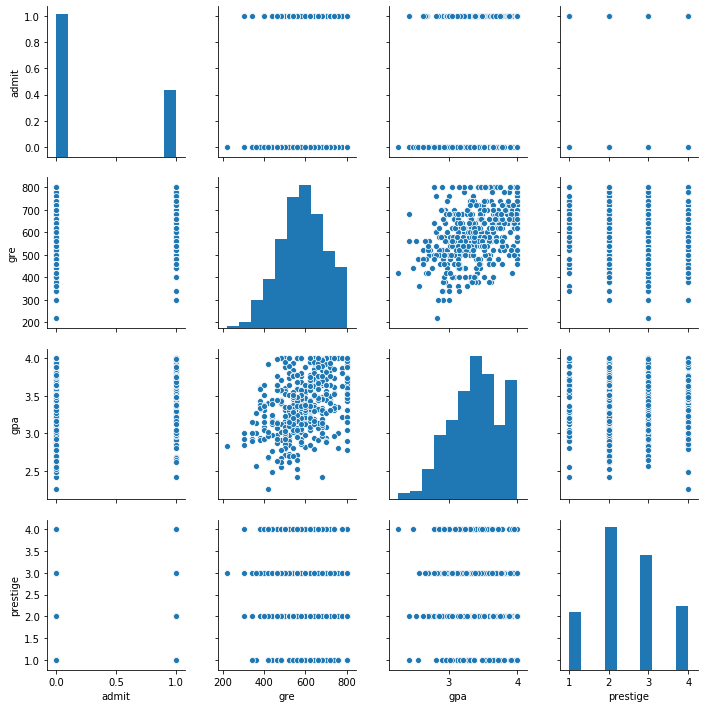

In [7]:
sns.pairplot(df);

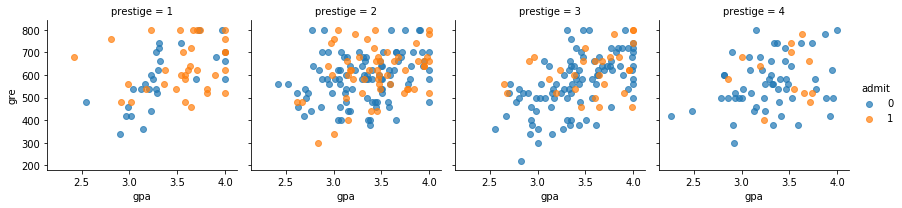

In [8]:
g = sns.FacetGrid(df, col="prestige", hue="admit")
g.map(plt.scatter, "gpa", "gre", alpha=.7)
g.add_legend();

Para ver de forma un poco más clara, podemos hacer histogramas agrupando según el valor de *admit*. Podemos ver que hay ligeras modificaciones en la mediana que podrían predecir el valor de *admit*.

C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\pandas\plotting\_core.py:2254: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


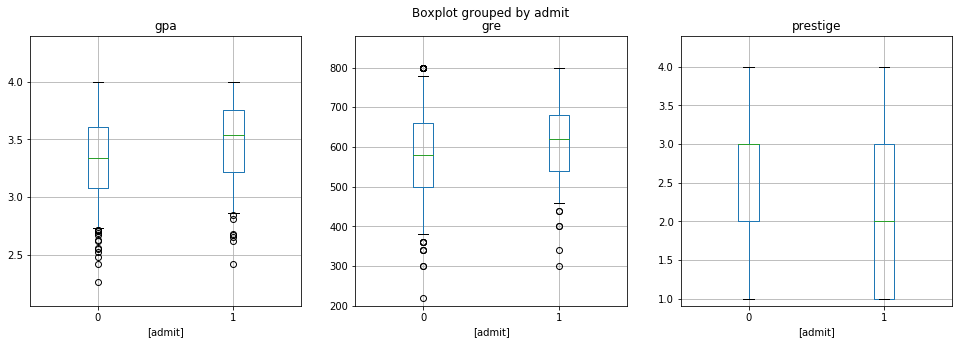

In [9]:
fig, ax_new = plt.subplots(1,3, sharey=False,figsize=(16,5))
axes_ = df.boxplot(by='admit',ax=ax_new,return_type='axes',whis=[5,95]);
for ax,col in zip(axes_,['gpa','gre','prestige']):
    ax.set_ylim(df[col].min()/1.1,df[col].max()*1.1)

Realicemos un tabla de contingencia de los 400 casos, tabulados según presitigio (`prestige`) y su carácter de admitidos o no (`admin`)

In [10]:
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


Ahora, transformemos `prestige` en dummie 

In [11]:
dummy_prestige = pd.get_dummies(df["prestige"], prefix="prestige")

data = pd.concat([df,dummy_prestige],axis=1)

data.head()

,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3,prestige_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


#### Armamos las matrices X e y 

In [12]:
X = data[['gre','gpa','prestige_2','prestige_3','prestige_4']]
y = data["admit"]

#### Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=12)

## 3. Regresión logística con `sklearn`

#### Estandarización

In [14]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [15]:
lg = linear_model.LogisticRegression()

lg.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred_train = lg.predict(X_train_scaled)

y_pred_test = lg.predict(X_test_scaled)

C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
lg.coef_

array([[ 0.19732874,  0.22627665, -0.27429697, -0.48245073, -0.50726909]])

In [17]:
lg.intercept_

array([-0.81202234])

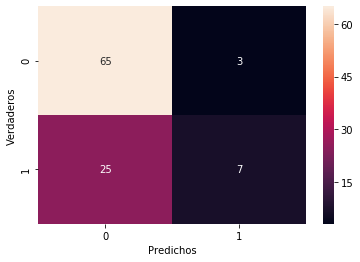

In [18]:
# Elaboramos la matriz de confusión:

confusion_matrix(y_test, y_pred_test)

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)


plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [19]:
# Calculamos el accuracy

accuracy_score(y_test, y_pred_test)

0.72

## Regresión logística con `statsmodels`

In [20]:
import statsmodels.api as sm

In [21]:
X_train_stats = sm.add_constant(X_train_scaled)

In [22]:
logit = sm.Logit(y_train, X_train_stats)
result = logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.588205
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.058     
Dependent Variable: admit            AIC:              364.9233  
Date:               2019-07-14 15:07 BIC:              387.1460  
No. Observations:   300              Log-Likelihood:   -176.46   
Df Model:           5                LL-Null:          -187.30   
Df Residuals:       294              LLR p-value:      0.00060342
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -0.8291     0.1315   -6.3046   0.0000   -1.0869   -0.5714
x1         0.2004     0.1405    1.4270   0.1536   -0.0749 

In [23]:
X_test_stats = sm.add_constant(X_test_scaled)

In [24]:
y_pred_stats = result.predict(X_test_stats) > 0.5
confusion_matrix(y_test, y_pred_stats)

array([[65,  3],
       [25,  7]], dtype=int64)

In [25]:
accuracy_score(y_test, y_pred_stats)

0.72